In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_score, recall_score, balanced_accuracy_score, accuracy_score,f1_score, matthews_corrcoef

# RANDOM BASELINE with dummy classifier from sklearn

In [2]:
with open('../3_go_dict/classes.pkl', 'rb') as f:
    names = pickle.load(f)

In [3]:
df = pd.read_pickle("DatasetHomology50")
summed = np.array(df["preds"].sum())
chances = np.divide(summed, 34451)

In [4]:
score = []
prec = []
rec = []
bal_acc = []
f1 = []
mcc = []

dic_prec = {}
dic_rec = {}
dic_acc = {}
dic_f1 = {}
dic_mcc = {}
for name in names:
    if name != "GO:0003674":
        df = pd.read_pickle("Testset.pkl")
        df["result"] = df["preds"].apply(lambda x: 1 if x[names[name]]==1 else 0)
        dummy = DummyClassifier()
        X = df["SeqVec"]
        y = df["result"]
        dummy.fit(X, y)
        y_pred = dummy.predict(X)
        prec.append(precision_score(y, y_pred))
        rec.append(recall_score(y, y_pred))
        score.append(accuracy_score(y,y_pred))
        bal_acc.append(balanced_accuracy_score(y,y_pred))
        f1.append(f1_score(y,y_pred))
        mcc.append(matthews_corrcoef(y,y_pred))
        dic_f1[name] = f1[-1]
        dic_prec[name] = prec[-1]
        dic_rec[name] = rec[-1]
        dic_acc[name] = bal_acc[-1]
        dic_mcc[name] = mcc[-1]

# Save dictionaries as pickles

In [9]:
with open("RandomBaseline.pkl","wb") as f:
    pickle.dump([dic_acc,dic_prec,dic_rec,dic_f1], f)

In [5]:
with open("MCCBaseline.pkl","wb") as f:
    pickle.dump(dic_mcc, f)

# Stratified

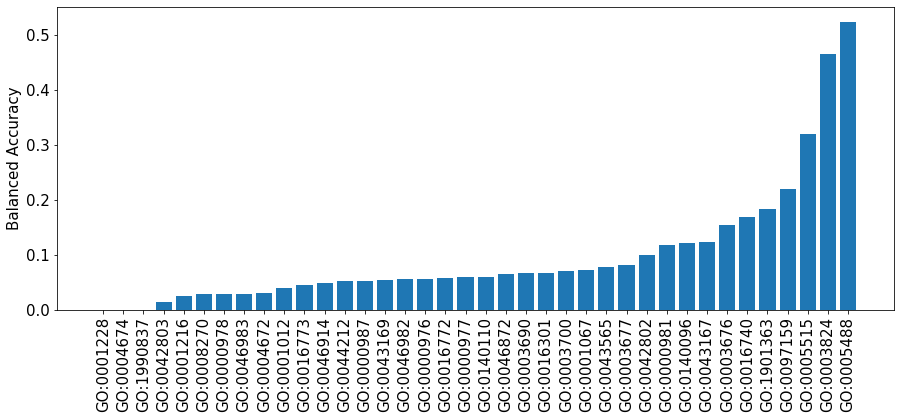

In [5]:
a=plt.figure(figsize=(15, 7))
plt.rcParams.update({'font.size': 15})

sorts = sorted(dic_rec.items(), key=lambda x: x[1])
terms = [i[0] for i in sorts]
probs = [i[1] for i in sorts]

plt.bar(terms, probs)
plt.rcParams.update({'font.size': 15})
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.3, top=0.90)
#plt.title('Accuracy of validation set')
plt.ylabel('Balanced Accuracy')
plt.show()

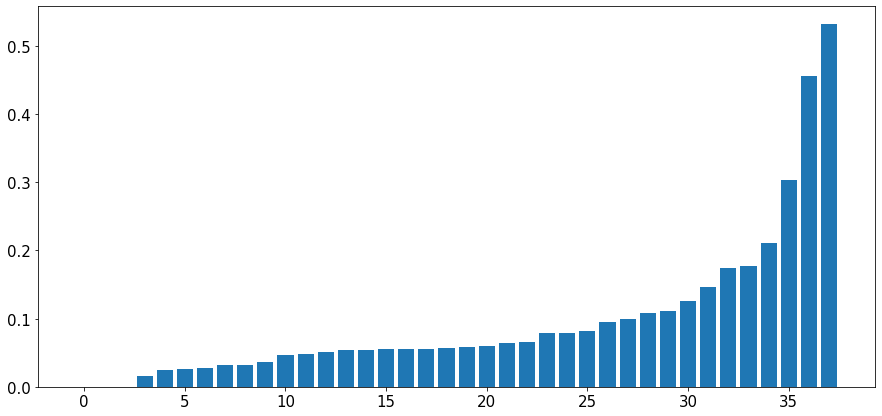

In [6]:
a=plt.figure(figsize=(15, 7))
plt.bar([i for i in range(38)], sorted(prec))
plt.rcParams.update({'font.size': 15})
plt.show()

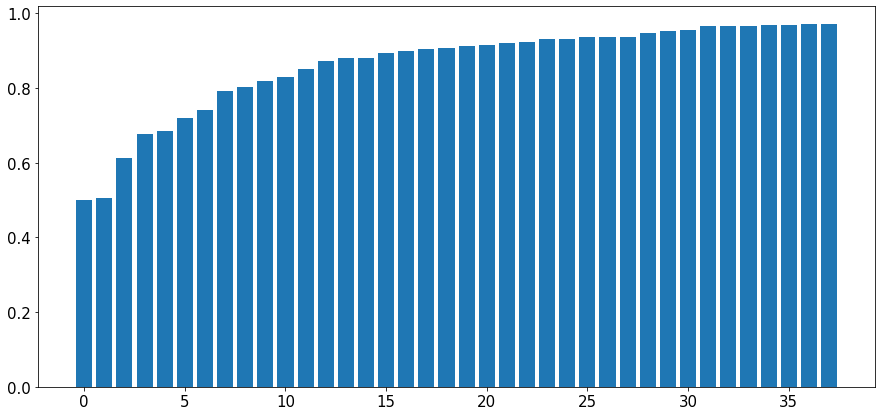

In [7]:
a=plt.figure(figsize=(15, 7))
plt.bar([i for i in range(38)], sorted(score))
plt.rcParams.update({'font.size': 15})
plt.show()

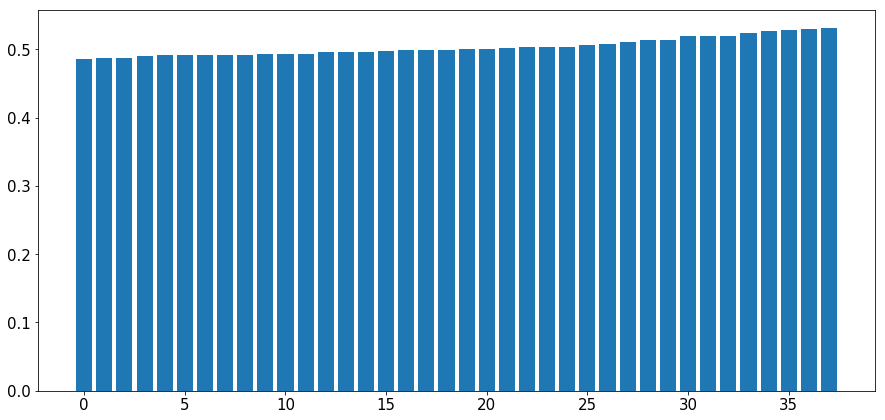

In [24]:
a=plt.figure(figsize=(15, 7))
plt.bar([i for i in range(38)], sorted(bal_acc))
plt.rcParams.update({'font.size': 15})
plt.show()